In [3]:
import sys
sys.path.append(r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\RLL_handwriting_data_generator\src\mark_1")
from image_generator_mark1 import fontWordOnImage, fontHelper
import json
import yaml
import os
import string
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

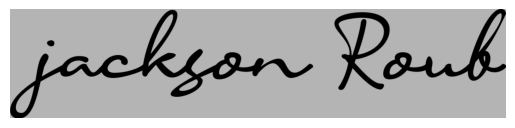

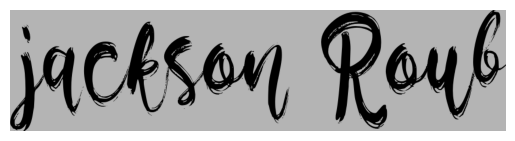

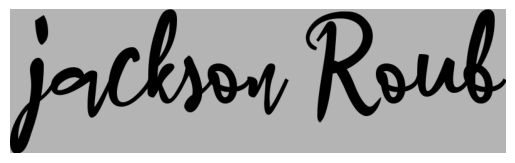

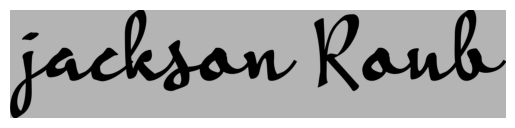

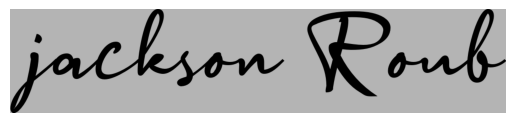

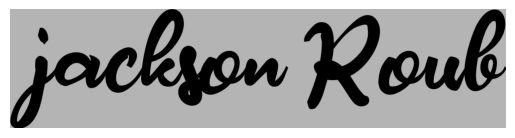

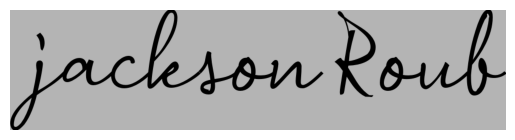

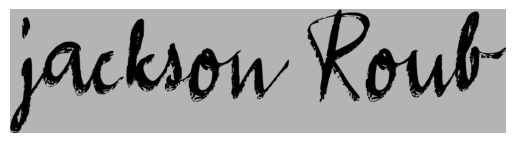

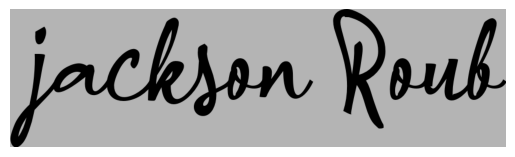

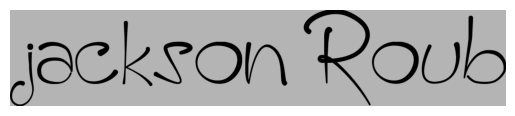

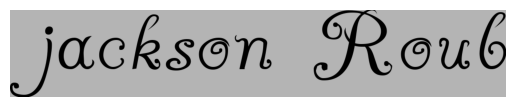

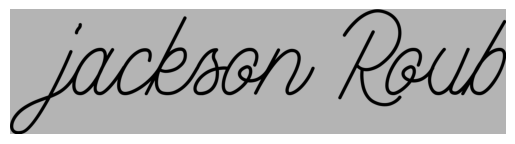

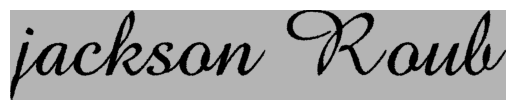

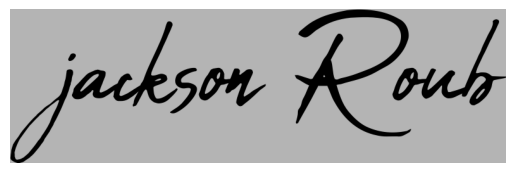

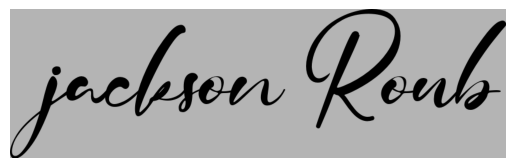

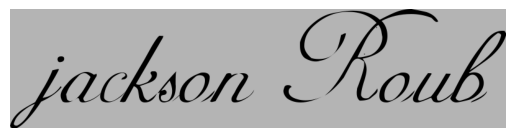

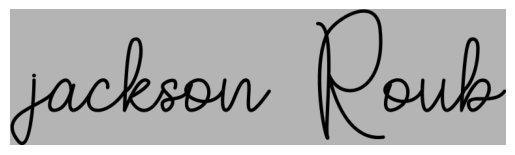

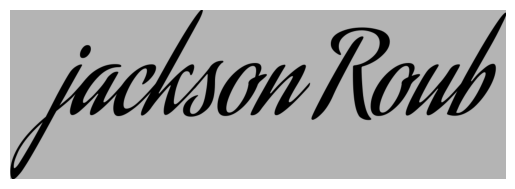

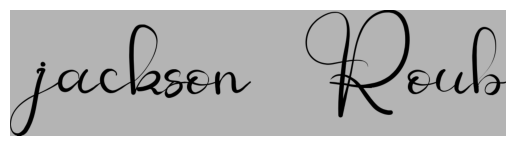

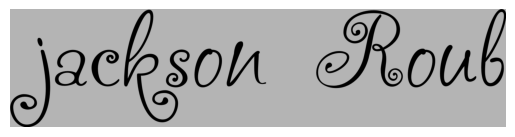

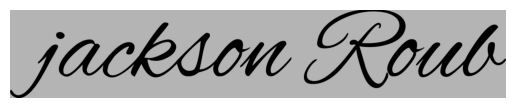

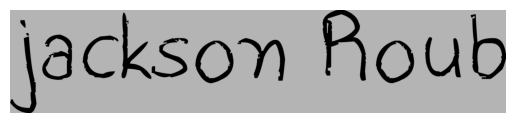

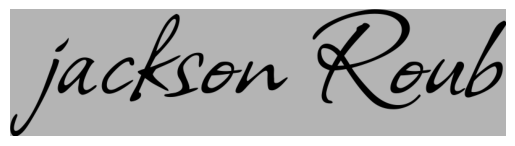

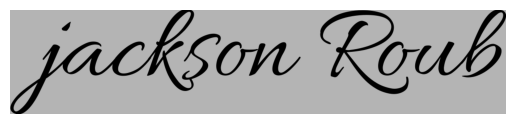

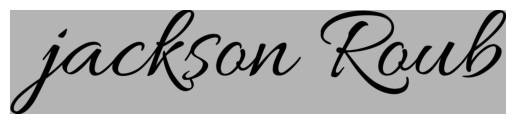

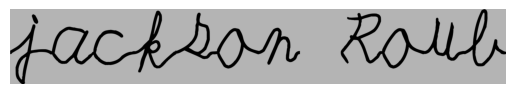

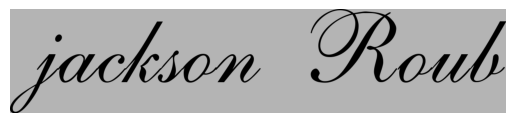

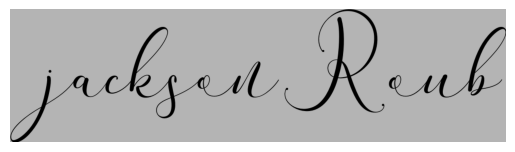

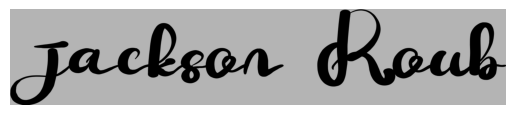

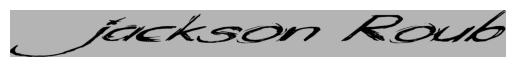

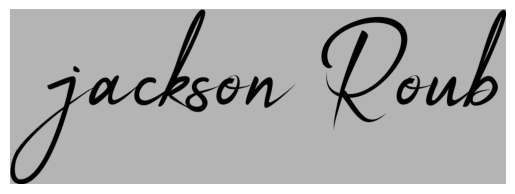

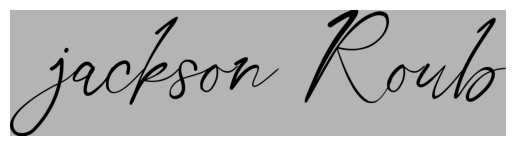

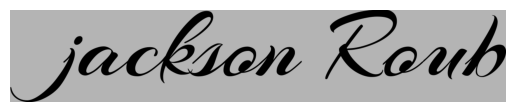

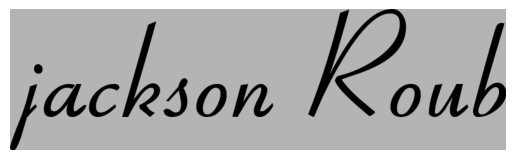

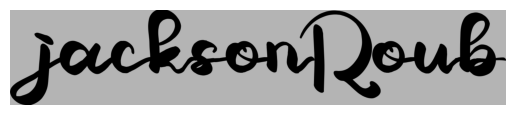

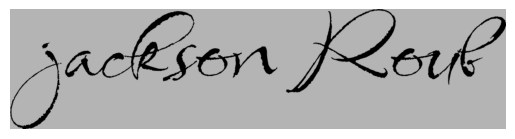

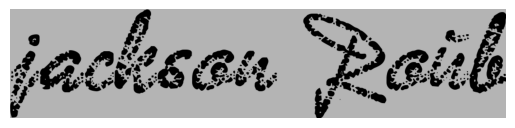

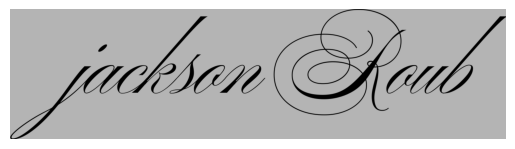

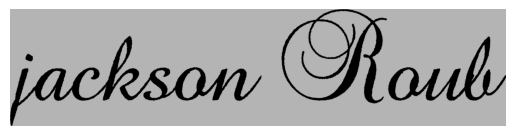

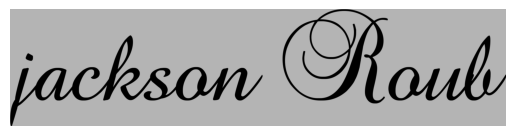

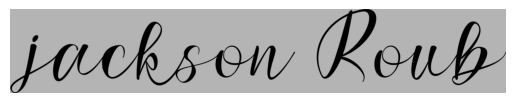

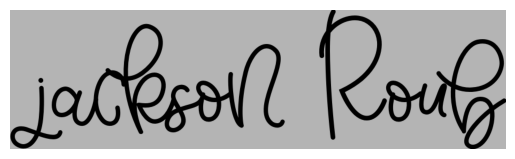

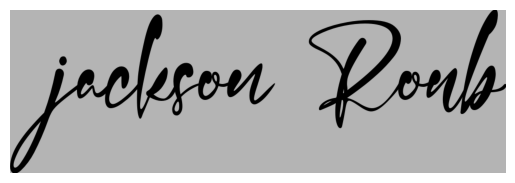

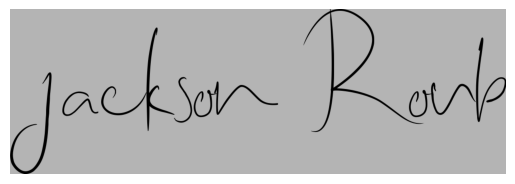

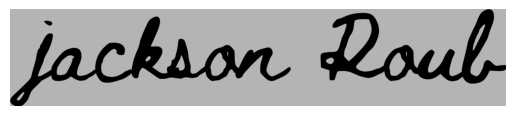

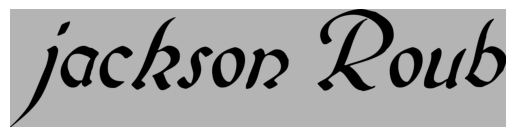

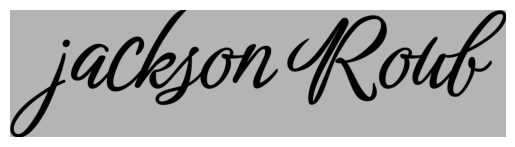

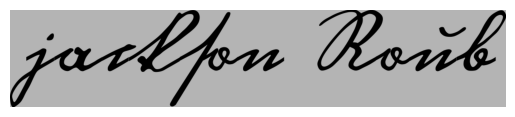

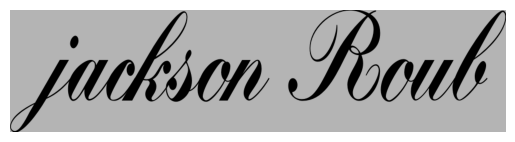

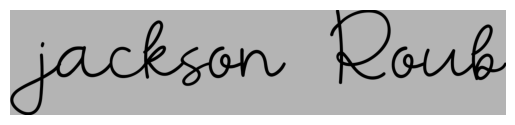

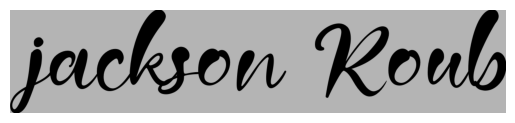

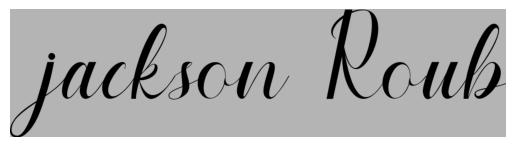

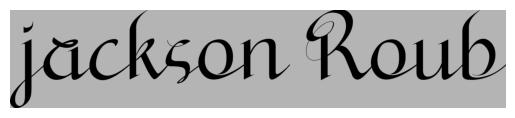

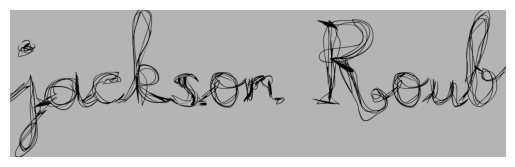

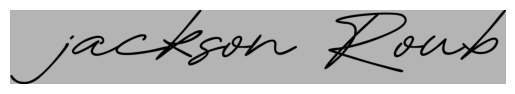

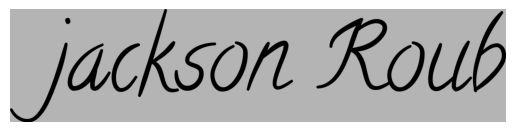

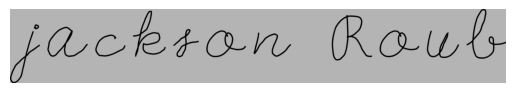

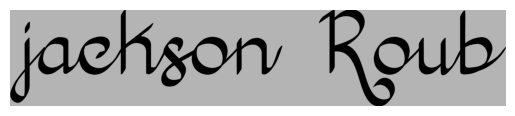

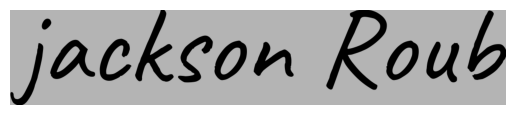

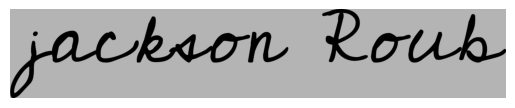

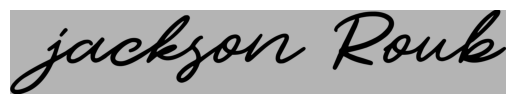

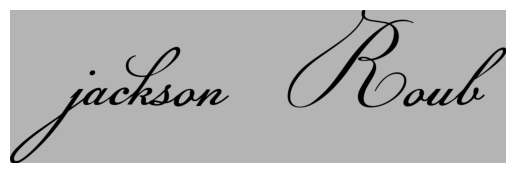

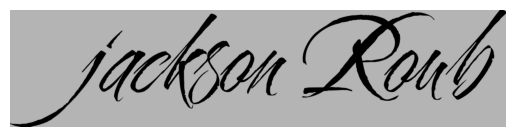

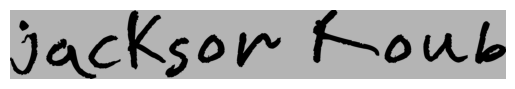

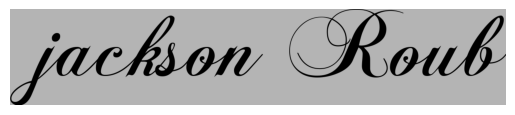

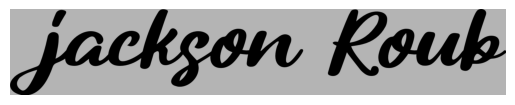

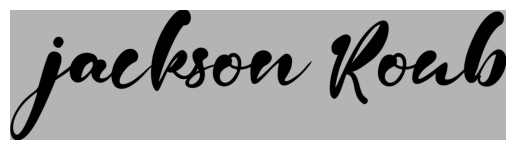

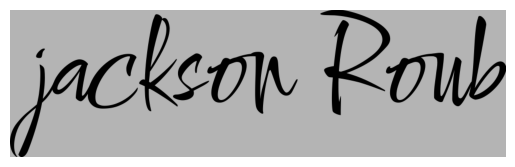

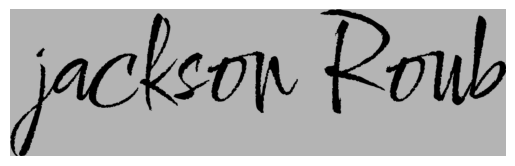

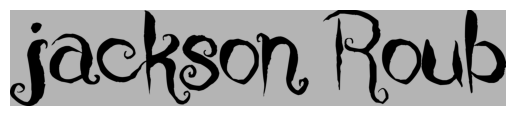

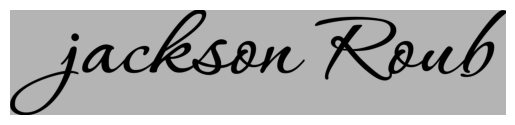

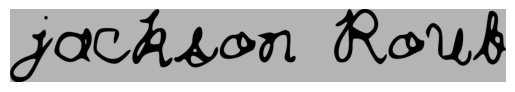

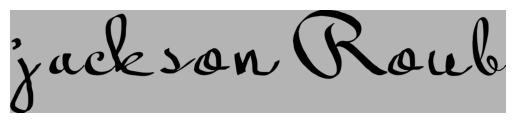

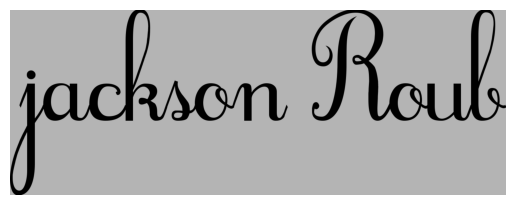

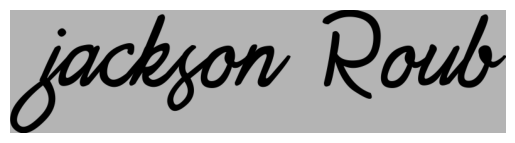

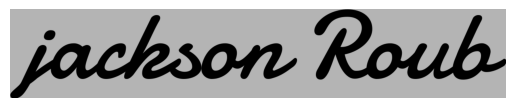

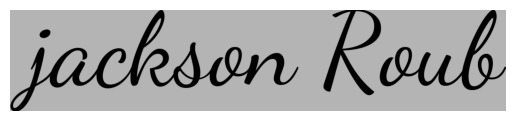

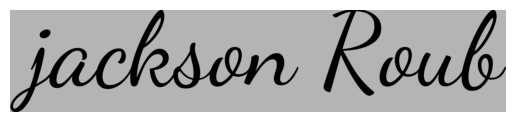

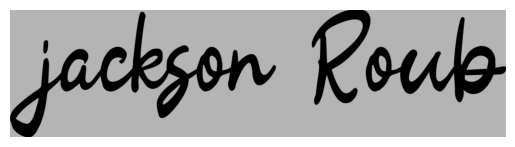

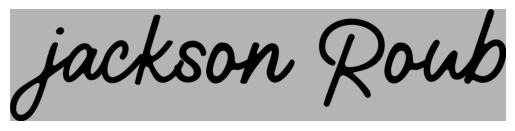

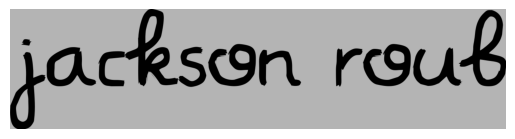

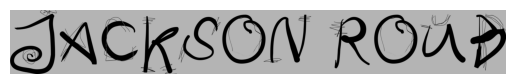

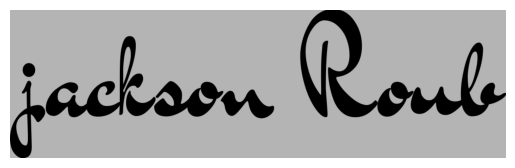

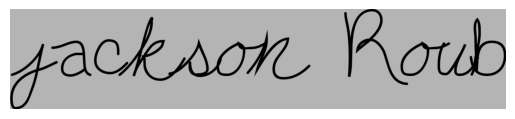

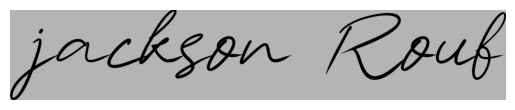

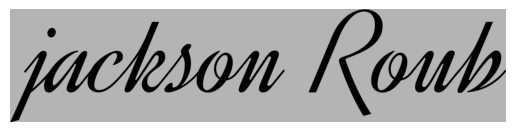

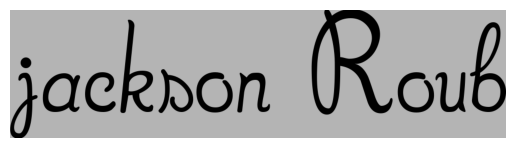

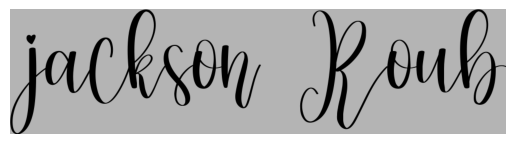

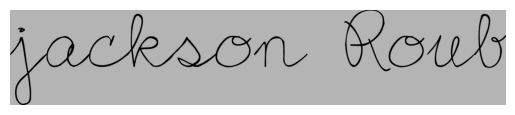

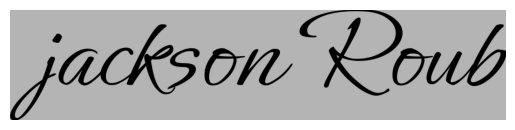

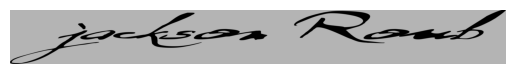

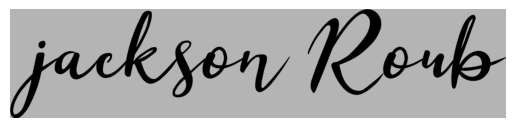

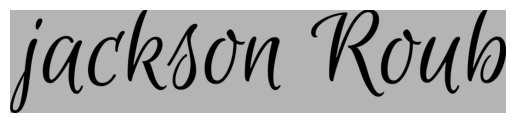

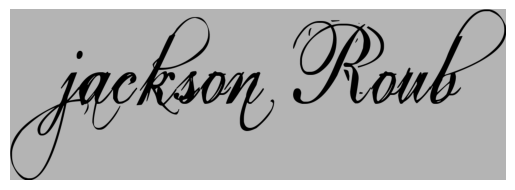

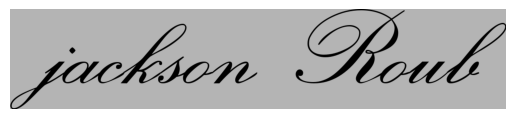

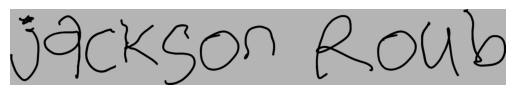

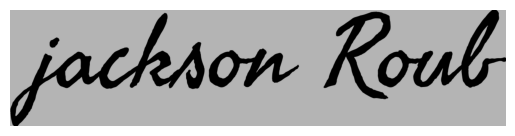

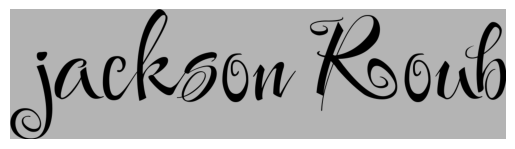

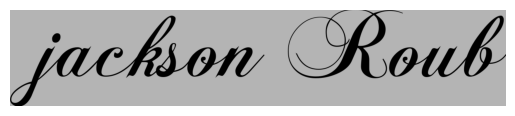

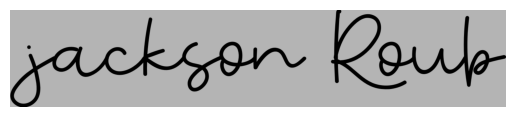

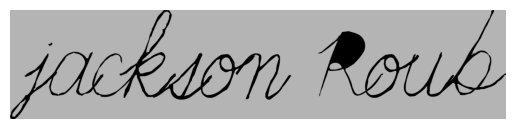

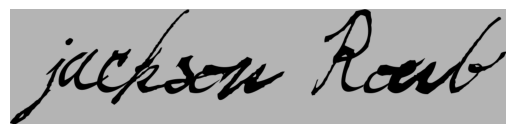

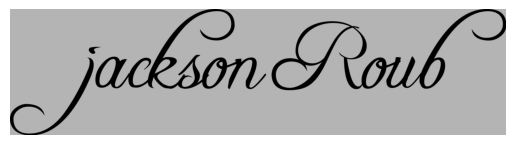

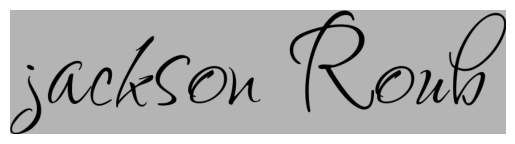

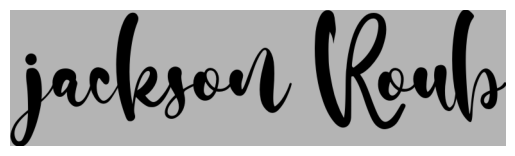

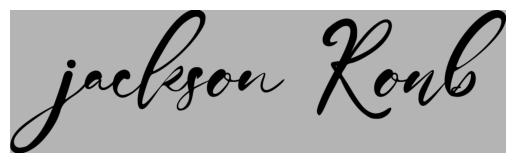

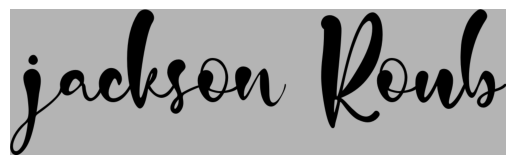

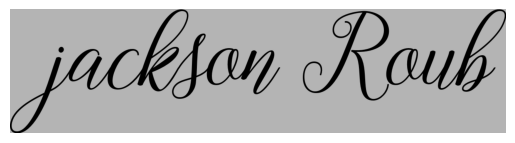

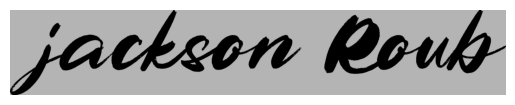

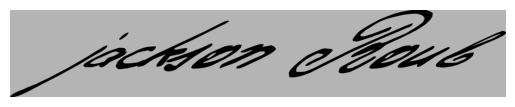

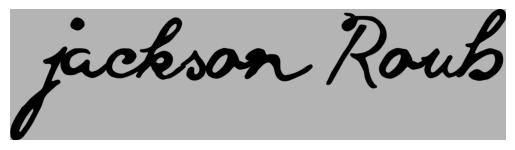

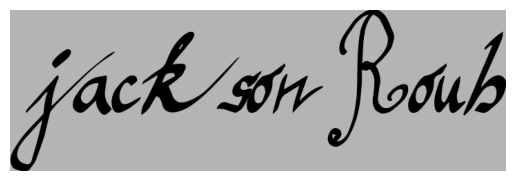

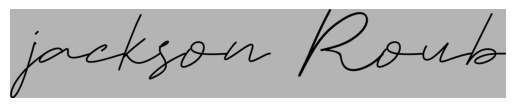

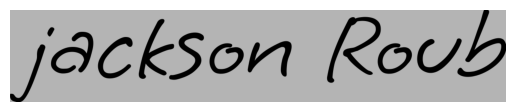

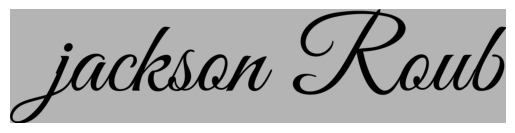

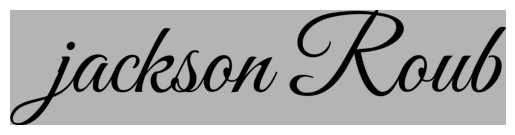

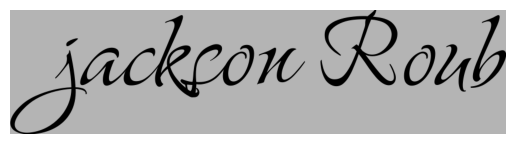

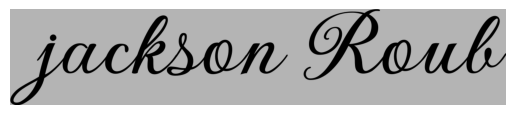

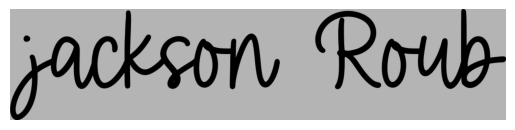

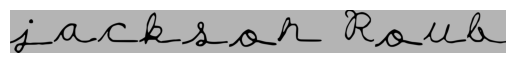

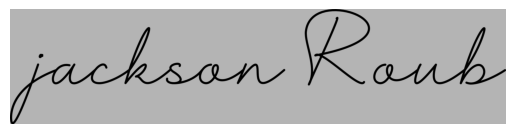

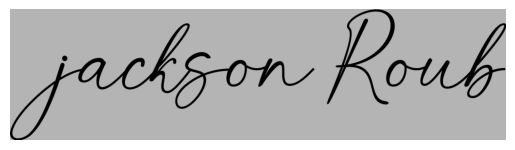

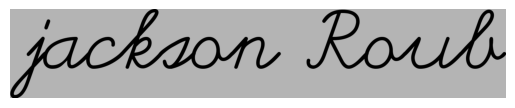

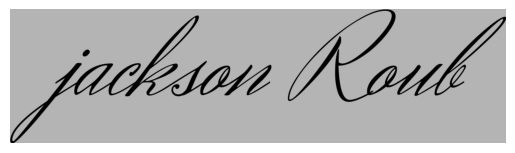

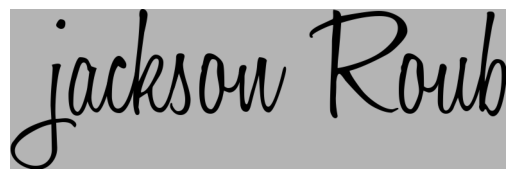

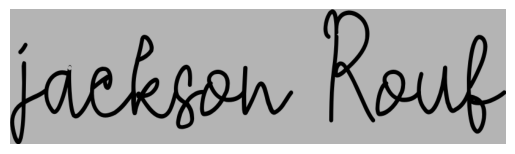

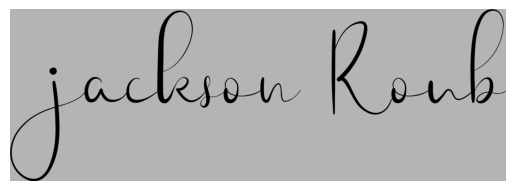

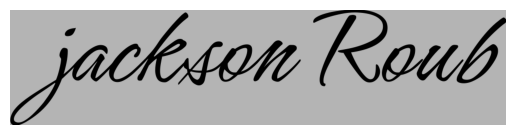

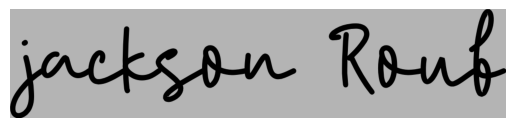

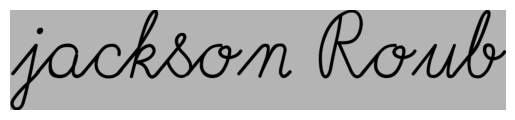

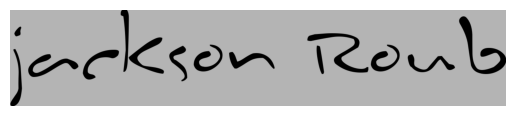

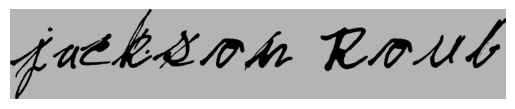

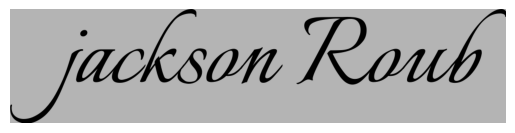

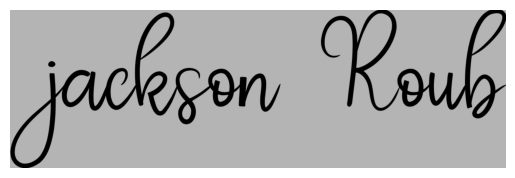

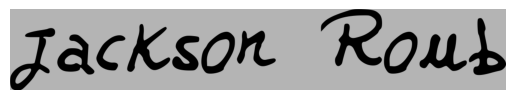

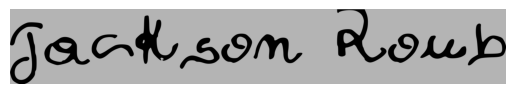

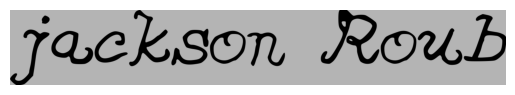

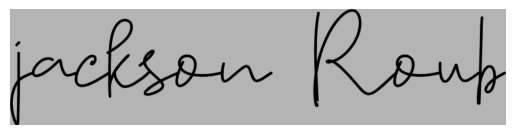

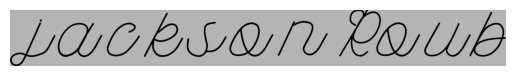

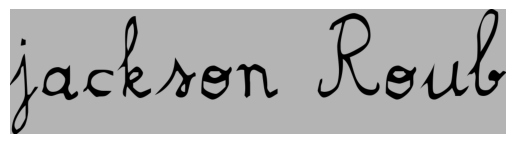

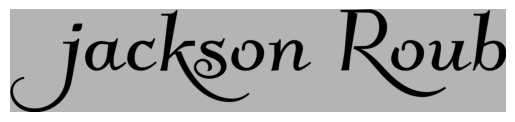

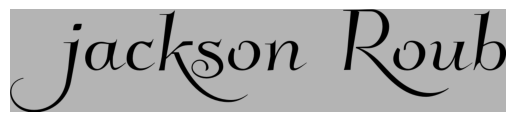

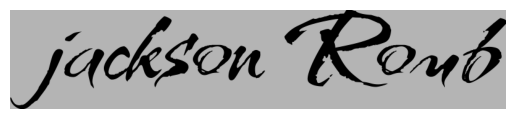

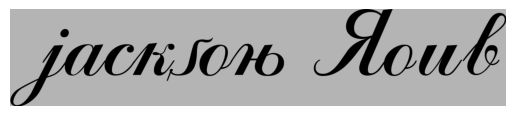

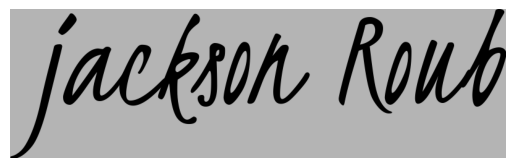

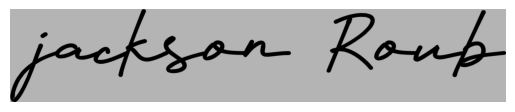

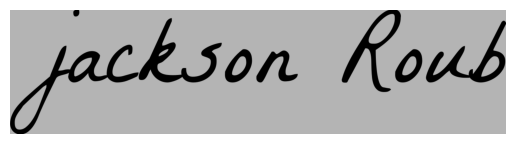

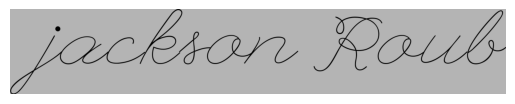

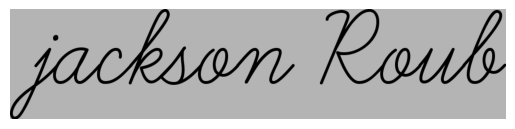

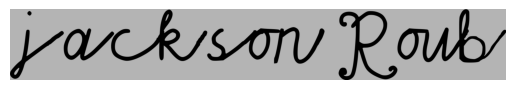

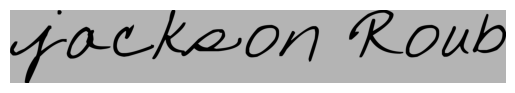

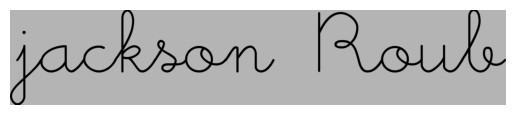

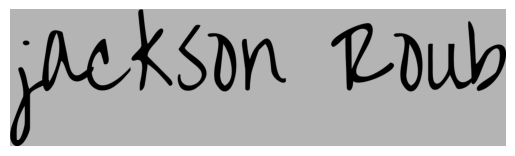

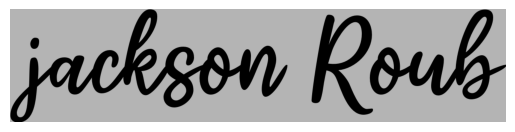

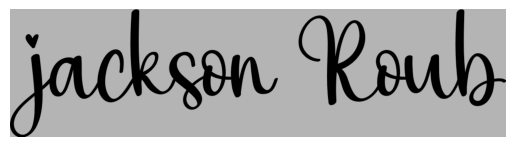

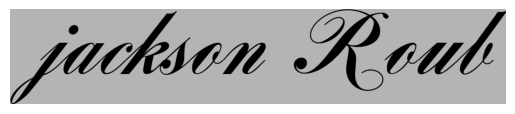

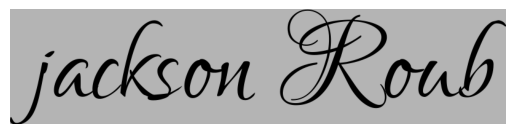

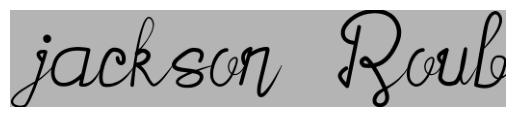

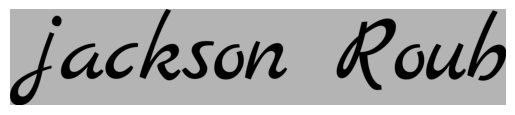

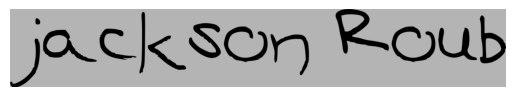

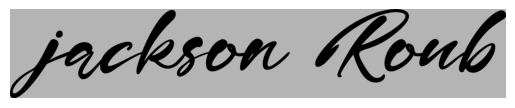

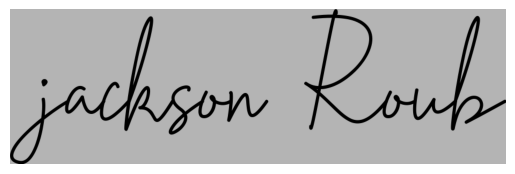

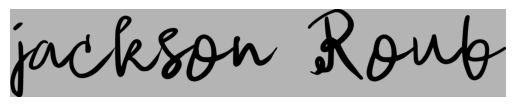

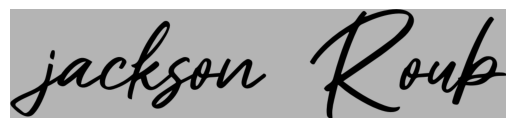

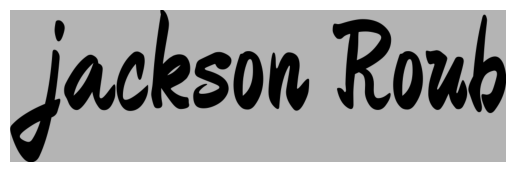

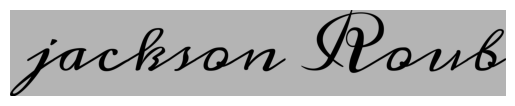

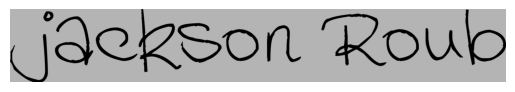

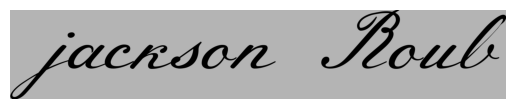

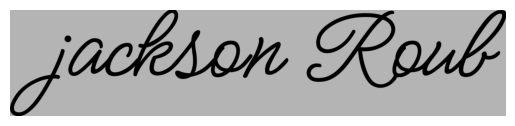

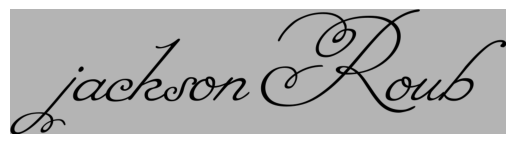

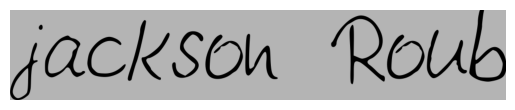

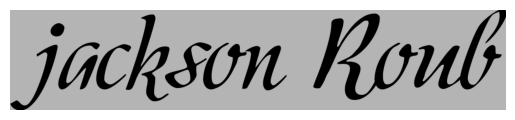

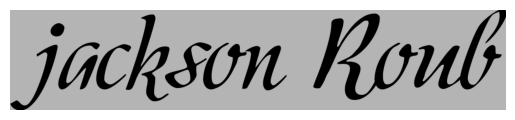

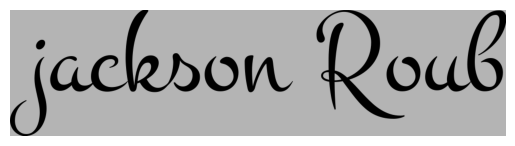

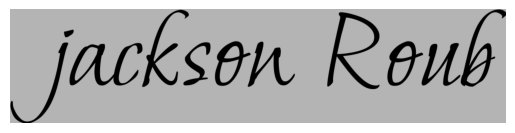

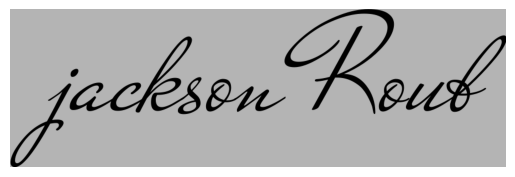

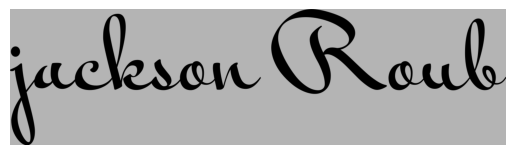

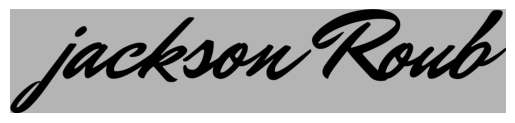

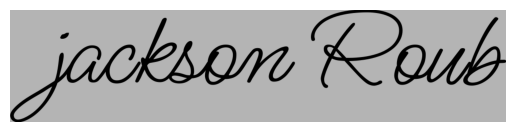

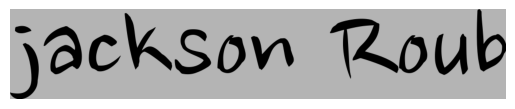

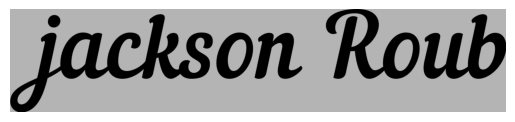

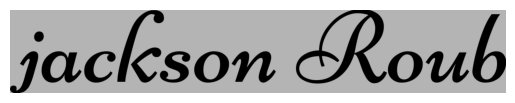

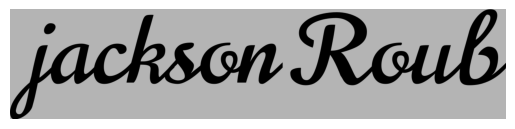

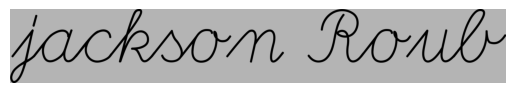

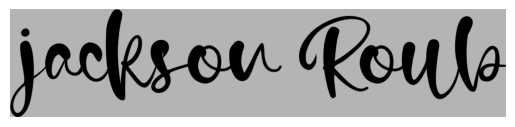

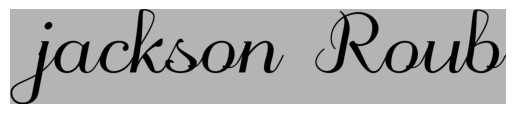

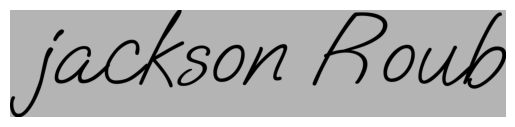

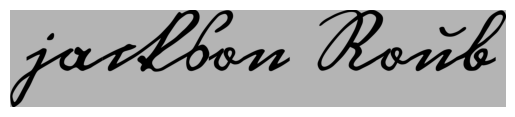

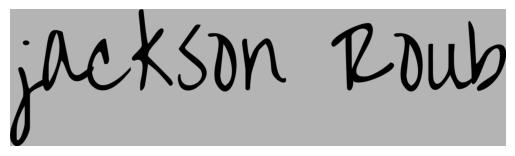

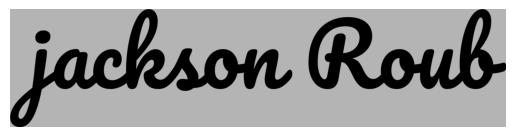

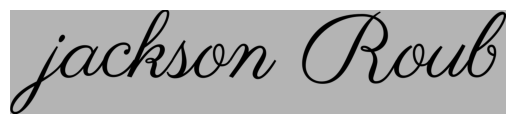

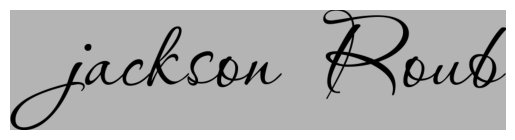

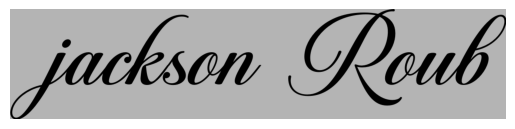

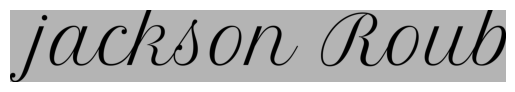

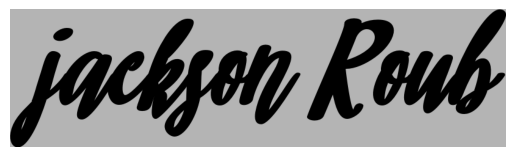

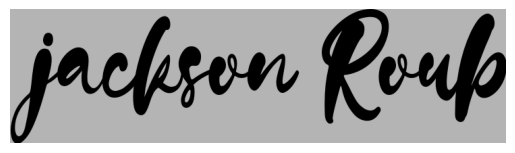

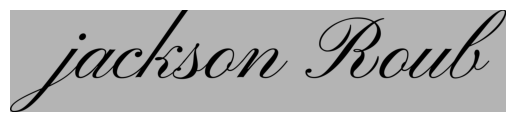

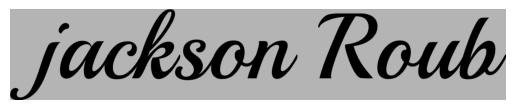

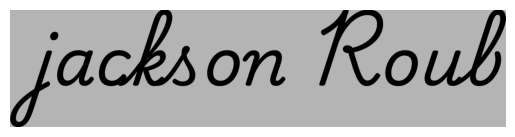

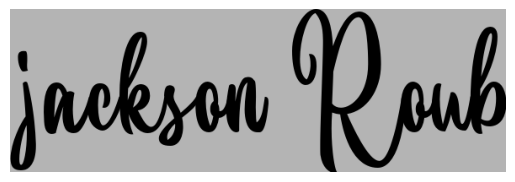

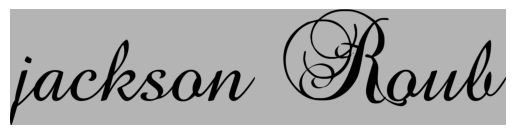

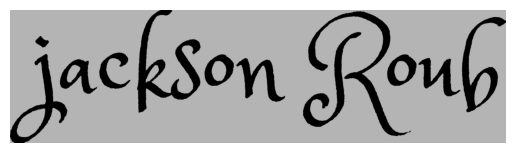

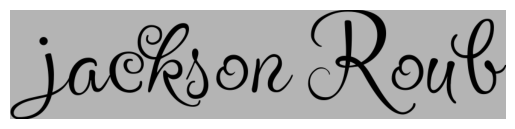

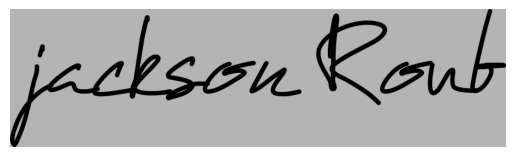

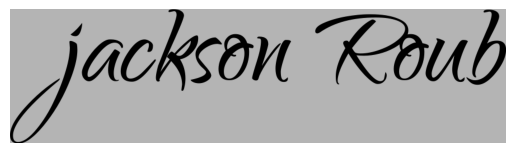

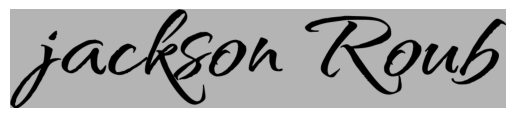

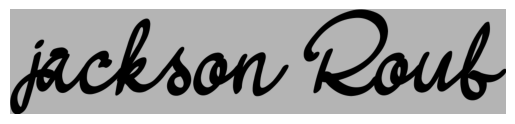

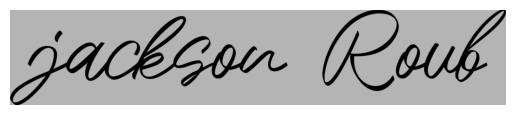

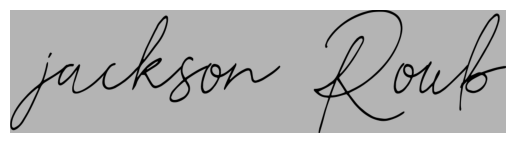

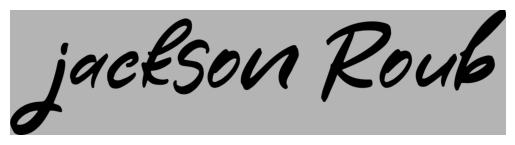

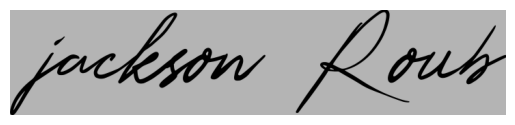

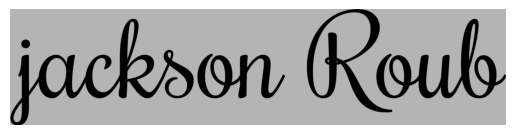

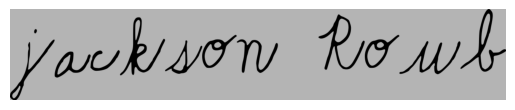

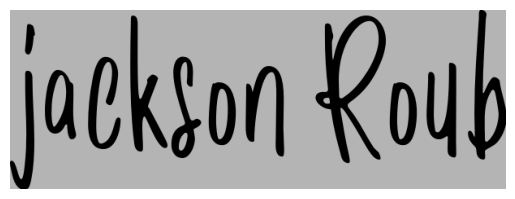

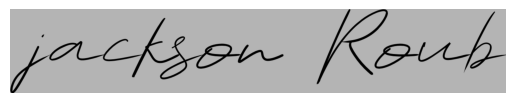

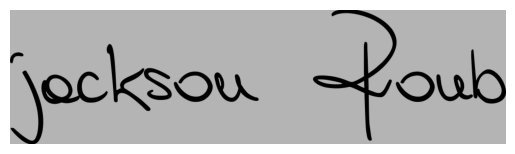

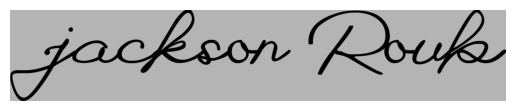

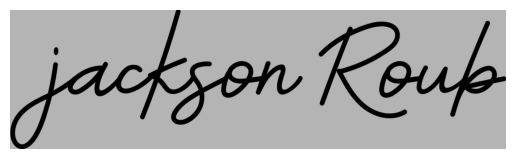

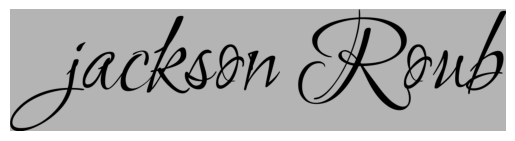

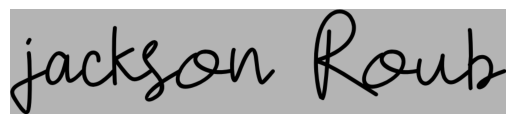

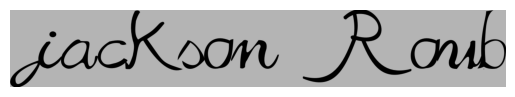

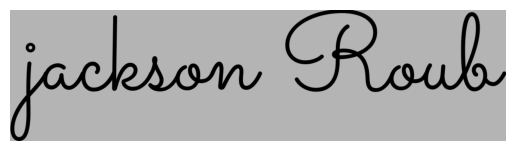

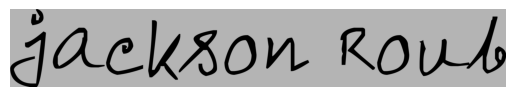

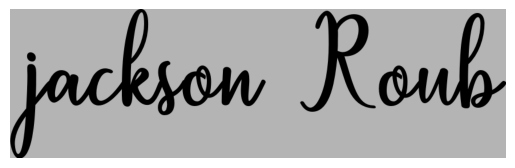

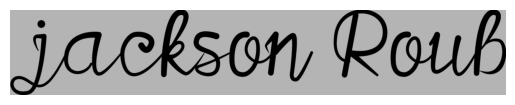

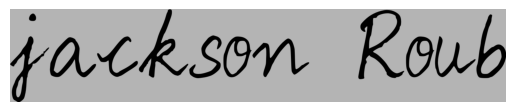

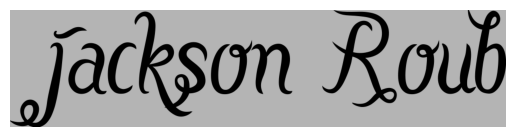

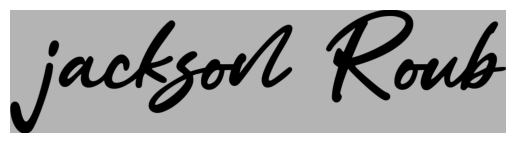

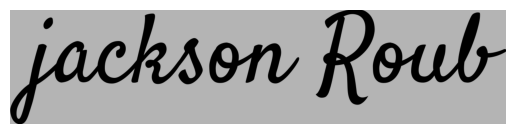

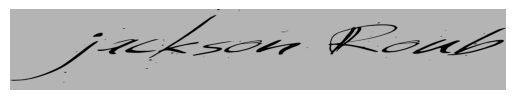

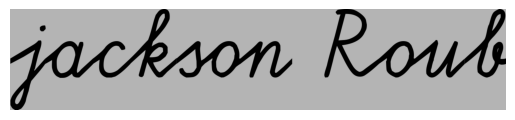

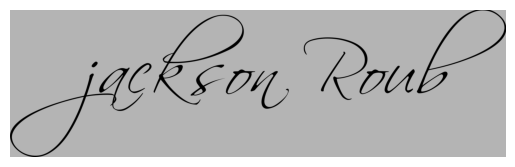

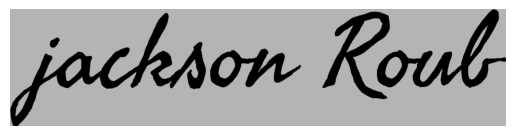

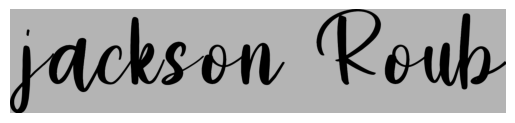

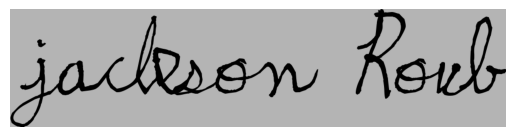

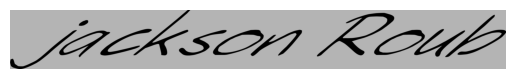

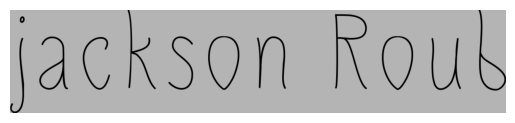

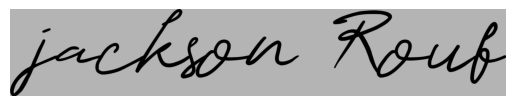

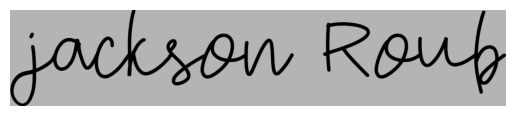

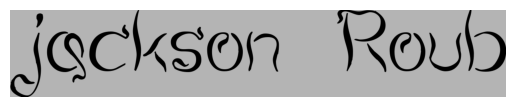

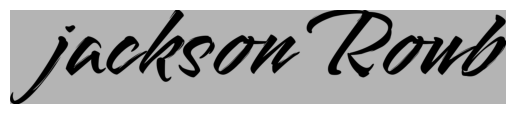

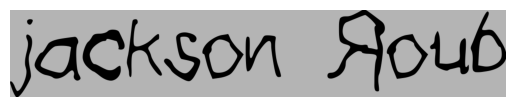

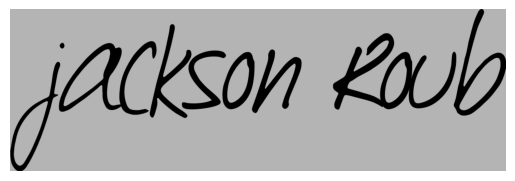

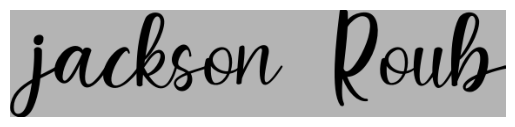

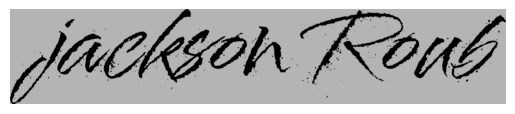

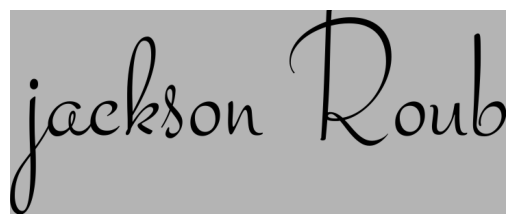

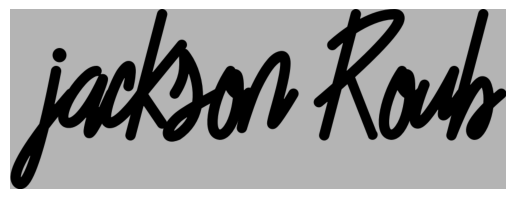

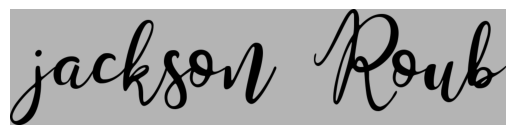

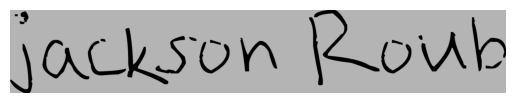

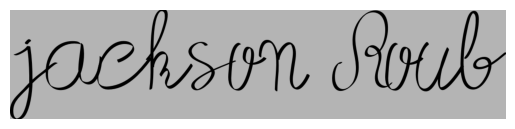

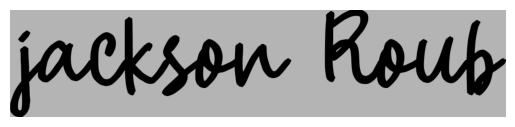

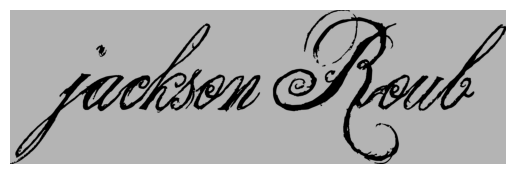

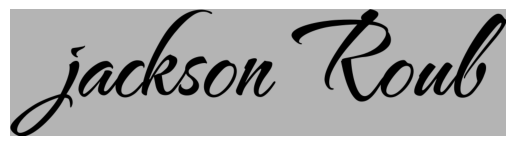

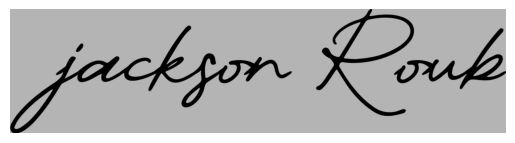

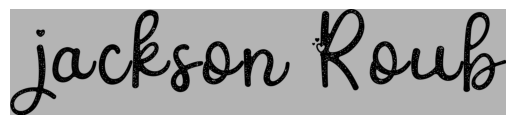

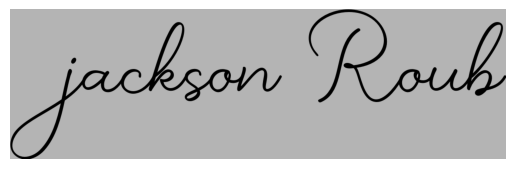

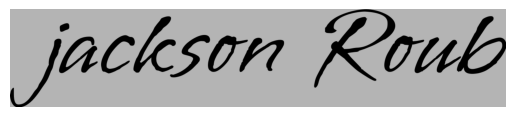

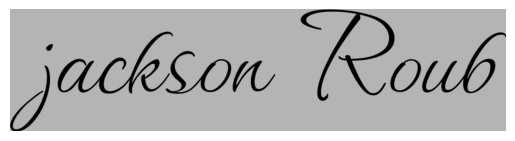

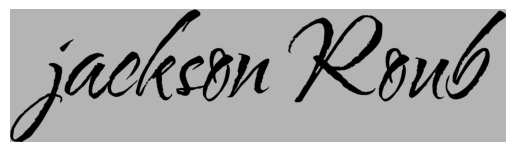

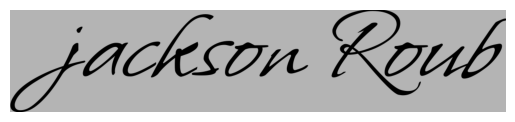

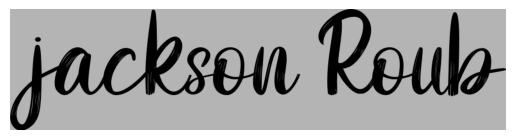

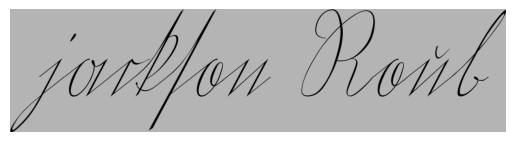

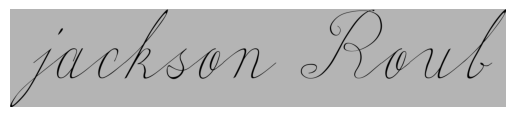

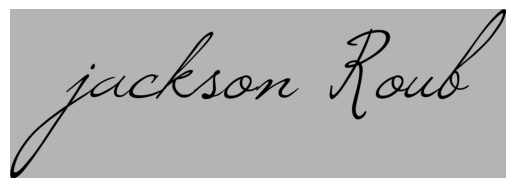

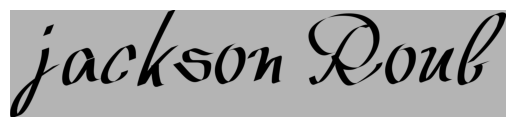

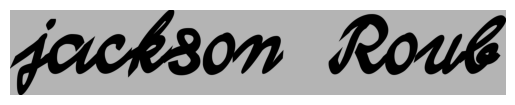

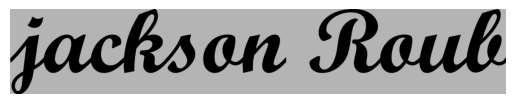

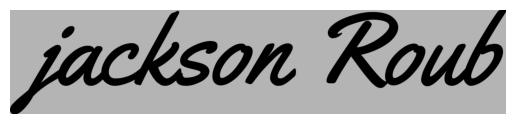

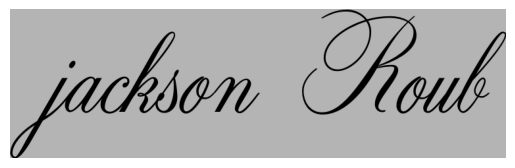

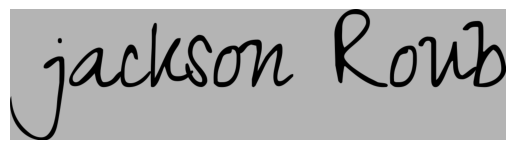

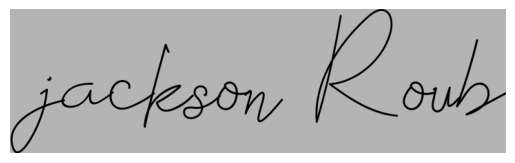

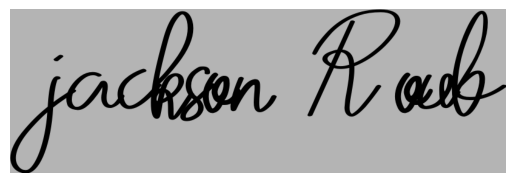

In [4]:
if __name__ == '__main__':
    output_json_file_path = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\RLL_handwriting_data_generator\fonts_and_weights\fonts_and_weights_handwriting_for_iowa_2.json"
    options = [1, 2, 3]
    vocab = ["jackson Roub"]

    font_dict_to_weights = {}

    root_directory_for_fonts = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\RLL_handwriting_data_generator\fonts"
    font_helper = fontHelper(root_directory_for_fonts)
    json_dict = font_helper.get_font_and_weight_dictionary_equal_weights()
    config_file_path = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\RLL_handwriting_data_generator\src\font_word_on_image_config_example.yaml"

    output_dir = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\sandbox\all_images"

    for font_path, weight in json_dict.items():
        font_name = os.path.splitext(os.path.basename(font_path))[0]

        font_dir = os.path.join(output_dir, font_name)

        if not os.path.exists(font_dir):
            os.makedirs(font_dir)

        for text in vocab:

            text_to_write = text
            
            font_size = 240
            font_object = ImageFont.truetype(font_path, font_size)

            background_color = 180

            temp_image = Image.new('RGB', (1, 1), color=(background_color, background_color, background_color))
            temp_draw = ImageDraw.Draw(temp_image)

            text_bbox = temp_draw.textbbox((0, 0), text_to_write, font=font_object)

            image_width = 5*(text_bbox[2] - text_bbox[0])
            image_height = 5*(text_bbox[3] - text_bbox[1])

            image = Image.new('RGB', (image_width+5, image_height+5), color=(background_color, background_color, background_color))

            font_color = 0

            text_width = image_width
            text_height = image_height

            text_start_y = round(text_height*0.2)
            text_start_x = round(text_width*0.2)

            draw = ImageDraw.Draw(image)
            draw.text((text_start_x, text_start_y), text_to_write, font=font_object, fill=(font_color, font_color, font_color))

            image_file_path = f"{font_dir}/{text}.png"

            image_as_array = np.array(image)
            # print(image_as_array.shape)

            top_of_text = 0
            bottom_of_text = image_height-1
            left_of_text = 0
            right_of_text = image_width-1

            height, width = image_as_array.shape[:2]

            for i in range(height):
                row = image_as_array[i, :, :]
                if np.any(row == font_color):
                    top_of_text = i
                    break

            for i in range((height-1), -1, -1):
                row = image_as_array[i, :, :]
                if np.any(row == font_color):
                    bottom_of_text = i
                    break

            for i in range(width):
                column = image_as_array[:, i, :]
                if np.any(column == font_color):
                    left_of_text = i
                    break

            for i in range((width-1), -1, -1):
                column = image_as_array[:, i, :]
                if np.any(column == font_color):
                    right_of_text = i
                    break

            # print("top_of_text: ", top_of_text)
            # print("bottom_of_text: ", bottom_of_text)
            # print("left_of_text: ", left_of_text)
            # print("right_of_text: ", right_of_text)

            if top_of_text > 0:
                top_of_text -= 1
                # print("entered top_of_text")
            if bottom_of_text < image_height-1:
                bottom_of_text += 1
                # print("entered bottom_of_text")
            if left_of_text > 0:
                left_of_text -= 1
                # print("entered left_of_text")
            if right_of_text < image_width-1:
                right_of_text += 1
                # print("entered right_of_text")
            

            array_of_interest = image_as_array[top_of_text:bottom_of_text, left_of_text:right_of_text, :]
            image = Image.fromarray(array_of_interest)

            plt.imshow(image)
            plt.axis("off")
            plt.show()

            use_font = input("If this font is to be used type: \'y\' else type: \'n\' --: ")

            if use_font == 'y':
                weight = input("Less: \'1\', Normal: \'2\', More: \'3\' --: ")
                valid_options = set(["1", "2", "3"])
                while weight not in valid_options:
                    print("invalid options, try again.")
                    weight = input("Less: \'1\', Normal: \'2\', More: \'3\' --: ")

                weight_as_int = int(weight)

                font_dict_to_weights[font_path] = weight_as_int
                
    with open(output_json_file_path, 'w') as json_out:
        json.dump(font_dict_to_weights, json_out)
    
                    


